## QLIPP CALIBRATION NOTEBOOK

In [1]:
import time
import os, sys
from pycromanager import Bridge

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import numpy as np
from recOrder.recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.recOrder.calib.CoreFunctions import snap_image

In [3]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration()
calib.mmc = mmc
calib.mm = mm
calib.print_details = True

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Calculating Blacklevel ...
Blacklevel: 119.78344603776932

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (65535.000000, 0.010000, 0.250000)
update (65534.986924, 0.010000, 0.350000)
update (65534.478185, 0.010000, 0.450000)
update (65532.819833, 0.010000, 0.550000)
update (65532.717641, 0.110000, 0.450000)
update (65511.748984, 0.110000, 0.550000)
update (65439.331694, 0.210000, 0.450000)
update (28373.536118, 0.210000, 0.550000)
update (27982.707673, 0.210000, 0.650000)
update (15624.936917, 0.310000, 0.550000)
update (7722.989387, 0.310000, 0.650000)
coarse search done
better lca = 0.31000000000000005
better lcb = 0.6499999999999999
better int = 7722.989387273788
grid search done
lca = 0.31000000000000005
lcb = 0.6499999999999999
intensity = 7722.989387273788

Starting fine search
	Optimize lca ...
	lca = 0.2973
	lcb = 0.6500
	Intensity = 7344.698618412018
	Intensity Difference = 6031.6474533%

	Optimize lcb ...
	lca = 0.2973
	lcb = 0.5927
	Intensi

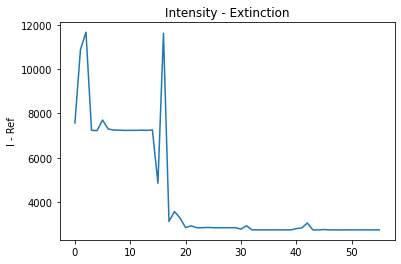

--------done--------


Calibrating State1 (I0)...
setting LCA = 0.1915
setting LCB = 0.5925


Intensity = 30506.460572242737
--------done--------

Calibrating State2 (I60)...
	Optimizing lca w/ constrained lcb ...
	lca = 0.3576
	lcb = 0.4740
	Intensity = 30513.762139320374
	Intensity Difference = 0.0239345%
setting LCA = 0.3576
setting LCB = 0.474


ratio: swing_LCB / swing_LCA = -1.7930 | target ratio: -1.793
total swing = 0.1356 | target = 0.10000000155458078


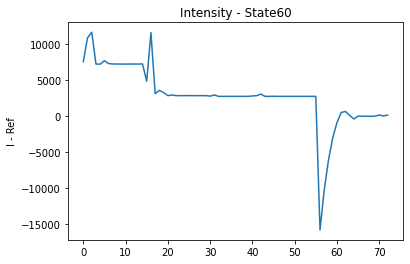

--------done--------

Calibrating State3 (I120)...

	Optimizing lca w/ constrained lcb ...
	lca = 0.3301
	lcb = 0.6616
	Intensity = 30507.56262421608
	Intensity Difference = 0.0036125%
setting LCA = 0.3301
setting LCB = 0.6616


ratio: swing_LCB / swing_LCA = 1.7930 | target ratio: 1.793
total swing = 0.0792 | target = 0.10000000155458078


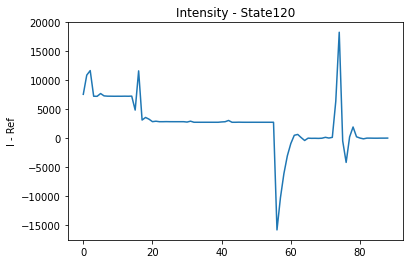

--------done--------

=======Finished Calibration=======

EXTINCTION = 121.54205792295413
Wall time: 1min 39s


In [5]:
%%time

calibration_scheme = '4-State Extinction'
# calibration_scheme = '5-State'
swing = 0.1
wavelength = 546
use_full_FOV = True
method = 'min_scalar'

meta_dir = 'Q:\\Cameron\\2021_05_21_Hummingbird_Speed_Test'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_dir, method, use_full_FOV))

In [6]:
232171.4/1000/60

3.8695233333333334

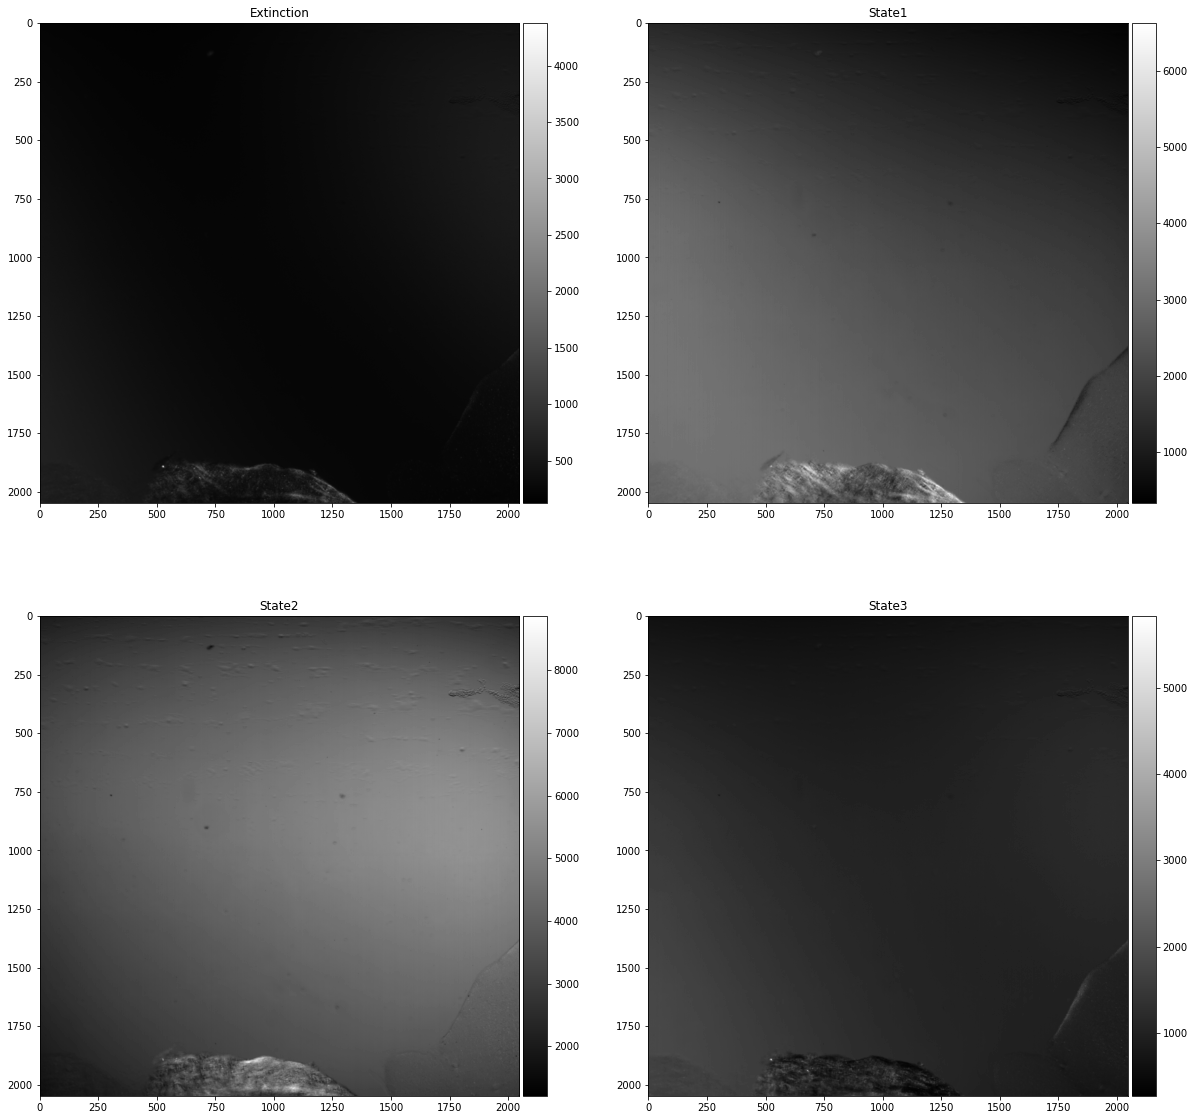

In [4]:
## Take set of BG Images

directory = meta_dir+'\\BG\\'

n_avg = 20

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)